# 4.a Using sklearn

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme()
import time

In [3]:
begin = time.time()

In [4]:
df = pd.read_csv(r"C:\Users\123sa\Downloads\spambase.data", header = None)

In [5]:
headers = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average","capital_run_length_longest","capital_run_length_total","labels"]
df.columns = headers

In [6]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,labels
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

 

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 100, criterion = "entropy")
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [10]:
model.score(X_test,y_test)

0.945691527878349

In [11]:
end = time.time()

In [12]:
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 3.555126190185547


# 4.b sensitivity of Random Forests to the parameter m

In [13]:
df1 = pd.DataFrame(columns=['Accuracy', 'Max features'])

for features in range(1,57):
    model = RandomForestClassifier(n_estimators= 100, criterion = "entropy",max_features= features )
    model.fit(X_train, y_train)
    accuracy = model.score(X_test,y_test)
    df1 = df1.append({'Accuracy': accuracy, 'Max features':features}, ignore_index=True)
    



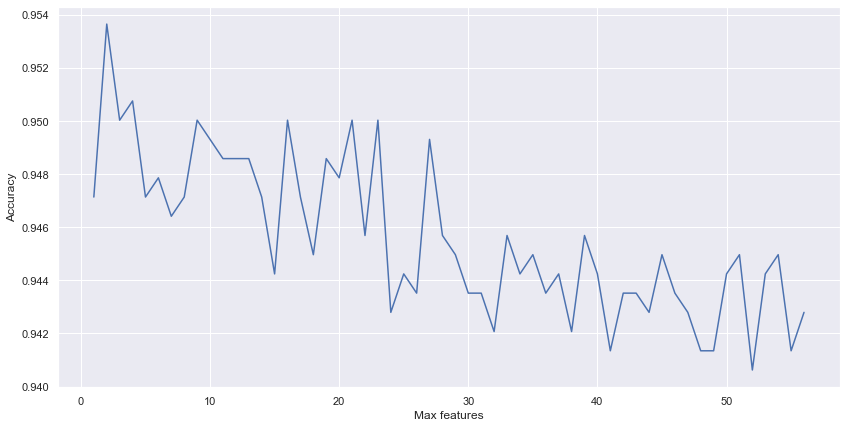

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df1, x='Max features', y='Accuracy', ax=ax);

# 4.C OOB

In [15]:
import math 

In [19]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [21]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=42,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=42,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=42,
        ),
    ),
]

In [22]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 15
max_estimators = 200
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

D:\Anaconda path\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda path\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda path\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda path\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda path\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comp

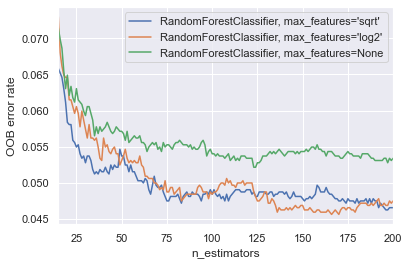

In [23]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()    

In [26]:
from sklearn.metrics import mean_squared_error


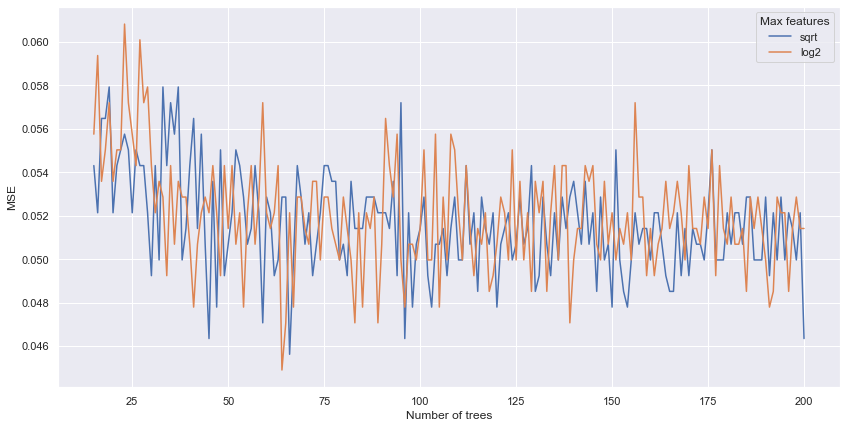

In [28]:
df = pd.DataFrame(columns=['Number of trees', 'MSE', 'Max features'])

for number_of_trees in range(15, 201):
    model = RandomForestClassifier(n_estimators=number_of_trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df = df.append({'Number of trees': number_of_trees, 'MSE': mean_squared_error(y_test, y_pred), 'Max features': 'sqrt'}, ignore_index=True)
    
    model = RandomForestClassifier(n_estimators=number_of_trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df = df.append({'Number of trees': number_of_trees, 'MSE': mean_squared_error(y_test, y_pred), 'Max features': 'log2'}, ignore_index=True)
    
    model = RandomForestClassifier(n_estimators=number_of_trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df = df.append({'Number of trees': number_of_trees, 'MSE': mean_squared_error(y_test, y_pred), 'Max features': None}, ignore_index=True)
    
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=df, x='Number of trees', y='MSE', hue='Max features', ax=ax);